In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
no_of_users=20
no_of_video=10
df=pd.DataFrame()
for i in range(no_of_users):
        
        for j in range(no_of_video):
            fname = 'HOG/hog_5_pt_cell/User '+str(i+1)+"/"+str(i+1)+'_'+str(j)+'_1.csv'
            df1 = pd.read_csv(fname, header=None)
            df1=pd.DataFrame(np.reshape(df1.values, (1,df1.shape[0]*df1.shape[1])))
            df=df.append(df1,ignore_index=True)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,107558,107559,107560,107561,107562,107563,107564,107565,107566,107567
0,0.00000,0.000000,0.000000,0.000000,-1.489290,1.579121,-4.689403,1.854014,3.122891,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.124046,1.160604,-0.524899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00000,0.000000,-0.045988,0.051102,0.000000,-0.336321,0.350750,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00000,0.000000,0.000000,0.000000,-1.997148,-3.021764,2.636925,2.819615,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00000,0.000000,0.000000,0.000000,-1.203405,1.271619,0.000000,-1.529917,1.586231,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.00000,0.000000,0.000000,-1.065638,1.136871,-2.392076,1.537345,1.006139,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,0.00000,0.000000,0.000000,0.000000,-0.824371,-0.808085,1.755801,-1.728817,1.786720,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,0.00000,0.003175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,-0.01274,0.016805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.050498,9.306627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.replace(0,np.nan).dropna(axis=1,how="all", inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
to_drop = df.eq(0).rolling(10).sum().eq(10).any()
df.drop(df.loc[:, to_drop].columns, axis=1, inplace=True)

In [6]:
Users=[]
Lecture=[]
for i in range(no_of_users):
    name="User "+ str(i+1)
    for j in range(no_of_video):
        lecture="Lecture "+ str(j+1)
        Users.append(name)
        Lecture.append(lecture)

      

df["Users"]=Users 
df["Lectures"]=Lecture
display(df)

,3,4,5,6,7,8,9,40,41,42,...,86658,86729,87666,88314,89142,89143,89394,91338,Users,Lectures
0,0.000000,-1.489290,1.579121,-4.689403,1.854014,3.122891,0.000000,0.000000,0.000000,-1.145302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,User 1,Lecture 1
1,0.000000,0.000000,0.000000,0.000000,-1.124046,1.160604,-0.524899,0.000000,-5.997377,-0.762828,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,User 1,Lecture 2
2,0.051102,0.000000,-0.336321,0.350750,0.000000,0.000000,0.000000,0.000000,-2.006719,-3.005683,...,-0.475271,-2.752359,-4.143232,0.783446,0.000000,0.00000,0.000000,0.000000,User 1,Lecture 3
3,0.000000,-1.997148,-3.021764,2.636925,2.819615,0.000000,0.000000,0.000000,0.000000,-1.076695,...,-1.079698,-5.172611,-0.117954,-3.779329,-14.130847,14.67293,6.613053,1.052201,User 1,Lecture 4
4,0.000000,-1.203405,1.271619,0.000000,-1.529917,1.586231,0.000000,-1.103177,0.317758,-3.508437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,User 1,Lecture 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.065638,1.136871,-2.392076,1.537345,1.006139,0.000000,0.000000,-1.000014,0.830322,0.235587,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,User 20,Lecture 6
196,0.000000,-0.824371,-0.808085,1.755801,-1.728817,1.786720,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,User 20,Lecture 7
197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,User 20,Lecture 8
198,0.000000,0.000000,0.000000,0.000000,0.000000,-9.050498,9.306627,-0.122129,0.128779,-0.216334,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,User 20,Lecture 9


In [7]:
df=df.set_index(['Users', 'Lectures'])

In [8]:
df.isnull().sum()

3        0
4        0
5        0
6        0
7        0
        ..
88314    0
89142    0
89143    0
89394    0
91338    0
Length: 10944, dtype: int64

In [9]:
df

3         4         5         6         7      \
Users   Lectures                                                       
User 1  Lecture 1   0.000000 -1.489290  1.579121 -4.689403  1.854014   
        Lecture 2   0.000000  0.000000  0.000000  0.000000 -1.124046   
        Lecture 3   0.051102  0.000000 -0.336321  0.350750  0.000000   
        Lecture 4   0.000000 -1.997148 -3.021764  2.636925  2.819615   
        Lecture 5   0.000000 -1.203405  1.271619  0.000000 -1.529917   
...                      ...       ...       ...       ...       ...   
User 20 Lecture 6  -1.065638  1.136871 -2.392076  1.537345  1.006139   
        Lecture 7   0.000000 -0.824371 -0.808085  1.755801 -1.728817   
        Lecture 8   0.000000  0.000000  0.000000  0.000000  0.000000   
        Lecture 9   0.000000  0.000000  0.000000  0.000000  0.000000   
        Lecture 10  0.000000  0.000000  0.000000  0.000000  0.000000   

                       8         9         40        41        42     ...  \
Users   Lectures                                                      ...   
User 1  Lecture 1   3.122891  0.000000  0.000000  0.000000 -1.145302  ...   
        Lecture 2   1.160604 -0.524899  0.000000 -5.997377 -0.762828  ...   
        Lecture 3   0.000000  0.000000  0.000000 -2.006719 -3.005683  ...   
        Lecture 4   0.000000  0.000000  0.000000  0.000000 -1.076695  ...   
        Lecture 5   1.586231  0.000000 -1.103177  0.317758 -3.508437  ...   
...                      ...       ...       ...       ...       ...  ...   
User 20 Lecture 6   0.000000  0.000000 -1.000014  0.830322  0.235587  ...   
        Lecture 7   1.786720  0.000000  0.000000  0.000000  0.000000  ...   
        Lecture 8   0.000000  0.000000  0.000000  0.000000  0.000000  ...   
        Lecture 9  -9.050498  9.306627 -0.122129  0.128779 -0.216334  ...   
        Lecture 10  0.000000  0.000000  0.000000 -4.773051  4.993218  ...   

                       86298     86586     86658     86729     87666  \
Users   Lectures                                                       
User 1  Lecture 1   0.000000  0.000000  0.000000  0.000000  0.000000   
        Lecture 2   0.000000  0.000000  0.000000  0.000000  0.000000   
        Lecture 3   2.809272 -1.117192 -0.475271 -2.752359 -4.143232   
        Lecture 4  -1.676774  0.739565 -1.079698 -5.172611 -0.117954   
        Lecture 5   0.000000  0.000000  0.000000  0.000000  0.000000   
...                      ...       ...       ...       ...       ...   
User 20 Lecture 6   0.000000  0.000000  0.000000  0.000000  0.000000   
        Lecture 7   0.000000  0.000000  0.000000  0.000000  0.000000   
        Lecture 8   0.000000  0.000000  0.000000  0.000000  0.000000   
        Lecture 9   0.000000  0.000000  0.000000  0.000000  0.000000   
        Lecture 10  0.000000  0.000000  0.000000  0.000000  0.000000   

                       88314      89142     89143     89394     91338  
Users   Lectures                                                       
User 1  Lecture 1   0.000000   0.000000   0.00000  0.000000  0.000000  
        Lecture 2   0.000000   0.000000   0.00000  0.000000  0.000000  
        Lecture 3   0.783446   0.000000   0.00000  0.000000  0.000000  
        Lecture 4  -3.779329 -14.130847  14.67293  6.613053  1.052201  
        Lecture 5   0.000000   0.000000   0.00000  0.000000  0.000000  
...                      ...        ...       ...       ...       ...  
User 20 Lecture 6   0.000000   0.000000   0.00000  0.000000  0.000000  
        Lecture 7   0.000000   0.000000   0.00000  0.000000  0.000000  
        Lecture 8   0.000000   0.000000   0.00000  0.000000  0.000000  
        Lecture 9   0.000000   0.000000   0.00000  0.000000  0.000000  
        Lecture 10  0.000000   0.000000   0.00000  0.000000  0.000000  

[200 rows x 10944 columns]

In [10]:
label_data=pd.read_excel("ML DATA ASSESSMENT_Rh_Ra.xlsx")

In [11]:
Label=label_data["Final_final_level"]

In [12]:
df["Class Label"]=list(Label)
df['Class Label'] = df['Class Label'].replace(2, 1)

In [13]:
df.head(20)

3         4         5         6         7         8  \
Users  Lectures                                                                 
User 1 Lecture 1   0.000000 -1.489290  1.579121 -4.689403  1.854014  3.122891   
       Lecture 2   0.000000  0.000000  0.000000  0.000000 -1.124046  1.160604   
       Lecture 3   0.051102  0.000000 -0.336321  0.350750  0.000000  0.000000   
       Lecture 4   0.000000 -1.997148 -3.021764  2.636925  2.819615  0.000000   
       Lecture 5   0.000000 -1.203405  1.271619  0.000000 -1.529917  1.586231   
       Lecture 6   0.233187  0.000000  0.000000  0.000000  0.000000  0.000000   
       Lecture 7   0.147968  0.136258  0.000000  0.000000 -0.799989  0.826918   
       Lecture 8   0.000000  0.000000 -1.067821  1.116596  0.000000 -2.063002   
       Lecture 9  -1.289995  1.391808 -0.077432  0.081015  0.000000 -5.784072   
       Lecture 10  0.000000 -0.231657  0.246325  0.000000 -1.823943  1.741935   
User 2 Lecture 1   0.000000  0.000000 -1.069865 -0.615935  0.523257  1.317972   
       Lecture 2   0.000000  0.000000  0.000000 -0.463677  0.482587 -0.905279   
       Lecture 3   0.056200  0.000000  0.000000  0.000000 -0.439398  0.454836   
       Lecture 4   0.000000  0.000000  0.000000 -0.364751  0.379426  0.000000   
       Lecture 5   0.006690  0.179747 -0.424411  0.444422  0.000000  0.000000   
       Lecture 6  -0.380757  0.409833  0.000000  0.000000  0.000000  0.000000   
       Lecture 7   0.000000 -0.741728  0.445453  0.000602  0.361784  0.000000   
       Lecture 8   0.000000  0.000000  0.000000 -2.292665  2.383451  0.000000   
       Lecture 9   0.000000 -0.366305  0.103632  0.295206 -3.889128  4.029909   
       Lecture 10  0.000000 -0.468566  0.495929 -0.933632  0.970008  0.000000   

                          9        40        41        42  ...     86586  \
Users  Lectures                                            ...             
User 1 Lecture 1   0.000000  0.000000  0.000000 -1.145302  ...  0.000000   
       Lecture 2  -0.524899  0.000000 -5.997377 -0.762828  ...  0.000000   
       Lecture 3   0.000000  0.000000 -2.006719 -3.005683  ... -1.117192   
       Lecture 4   0.000000  0.000000  0.000000 -1.076695  ...  0.739565   
       Lecture 5   0.000000 -1.103177  0.317758 -3.508437  ...  0.000000   
       Lecture 6   0.000000  0.000000  0.000000  0.000000  ...  0.000000   
       Lecture 7   0.000000  0.000000  0.000000  0.000000  ...  0.000000   
       Lecture 8   0.368283  0.000000 -2.577127  1.831804  ...  0.000000   
       Lecture 9   5.958268  0.000000 -0.381590  0.368132  ...  0.000000   
       Lecture 10  0.143635 -1.748762 -2.601845  1.294481  ...  0.000000   
User 2 Lecture 1   0.000000  0.000000  0.000000 -1.524869  ...  0.000000   
       Lecture 2   0.258751  0.000000  0.000000 -0.050091  ...  0.000000   
       Lecture 3   0.000000  0.000000 -1.720847  1.799827  ...  0.009949   
       Lecture 4   0.000000  0.000000  0.000000 -0.184671  ... -1.422362   
       Lecture 5   0.000000 -0.424100  0.447089 -0.500052  ...  0.000000   
       Lecture 6   0.000000  0.000000 -0.084992 -0.230840  ...  0.000000   
       Lecture 7   0.000000  0.261986  0.000000 -0.923677  ...  0.000000   
       Lecture 8  -2.723319  0.000000 -2.379884  2.246274  ...  0.000000   
       Lecture 9   0.000000  0.365078 -0.283586  0.296889  ...  0.000000   
       Lecture 10  0.000000 -0.297889  0.316702  0.000000  ...  0.000000   

                      86658     86729     87666     88314      89142  \
Users  Lectures                                                        
User 1 Lecture 1   0.000000  0.000000  0.000000  0.000000   0.000000   
       Lecture 2   0.000000  0.000000  0.000000  0.000000   0.000000   
       Lecture 3  -0.475271 -2.752359 -4.143232  0.783446   0.000000   
       Lecture 4  -1.079698 -5.172611 -0.117954 -3.779329 -14.130847   
       Lecture 5   0.000000  0.000000  0.000000  0.000000   0.000000   
       Lecture 6   0.000000  0.000000  0.000000  0.000000   0.0000

In [14]:
df.to_csv('final-dataframe.csv')

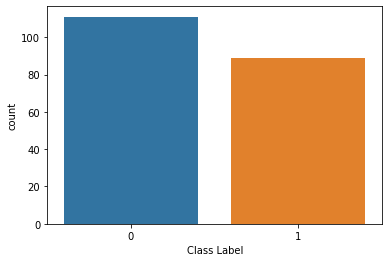

In [15]:
import seaborn as sns
sns.countplot(data=df, x="Class Label" )